<a href="https://colab.research.google.com/github/karrin10/Homework-5/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Kathleen Arrington


> 11/10/23


> Homework 5

In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Problem 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Defining model
def nonlinear_model(t_u, w2, w1, b):
  t_c = w2*t_u**2 + w1*t_u + b
  return t_c

In [ ]:
# Defining loss
def loss(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [ ]:
# Defining training
def nonlinear_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
      t_p_train = nonlinear_model(t_u_train, *params)
      train_loss = loss(t_p_train, t_c_train)

      t_p_valid = nonlinear_model(t_u_valid, *params)
      valid_loss = loss(t_p_valid, t_c_valid)

      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      if epoch % 500 == 0:
        print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params

In [ ]:
# Linear Optimizer
def linear_model1(t_u, w, b):
  return w*t_u + b

In [ ]:
# Linear Optimizer continued ...
def linear_training1(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = linear_model1(t_u_train, *params)
    train_loss = loss(t_p_train, t_c_train)

    t_p_valid = linear_model1(t_u_valid, *params)
    valid_loss = loss(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params

In [ ]:
# Declaring Temp values
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

t_u = torch.tensor(t_u)
t_c = torch.tensor(t_c)

In [ ]:
# Pre-processing and normalizing data
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

# Models of different learning rates (range: 0.1-0.0001)
learning_rates = [0.1, 0.05, 0.005, 0.0001]

# SGD Optimizers for each learning rate
print('SGD Optimizers:\n')
for rate in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.SGD([params], lr = rate)
  print(f'Learning rate of {rate}\n')
  nonlinear_training(epochs=5000, optimizer=optimizer, params=params, t_u_train=train_t_un, t_u_valid=val_t_un, t_c_train=train_t_c, t_c_valid=val_t_c)

# Adam Optimizers for each learning rate
print('Adam Optimizers:\n')
for rate in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.Adam([params], lr = rate)
  print(f'Learning rate of {rate}\n')
  nonlinear_training(epochs=5000, optimizer=optimizer, params=params, t_u_train=train_t_un, t_u_valid=val_t_un, t_c_train=train_t_c, t_c_valid=val_t_c)


SGD Optimizers:

Learning rate of 0.1

Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan

Learning rate of 0.05

Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500

Epochs: 500, 	Training Loss: 7.113917, 	Validation Loss: 2.719921

Epochs: 1000, 	Training Loss: 3.495521, 	Validation Loss: 2.726431

Epochs: 1500, 	Training Loss: 3.042541, 	Validation Loss: 2.729792

Epochs: 2000, 	Training Loss: 2.985834, 	Validation Loss: 2.731115

Epochs: 2500, 	Training Loss: 2.978735, 	Validation Loss: 2.731599

Epochs: 3000, 	Training Loss: 2.977845, 	Validation Loss: 2.731773

Epochs: 3500, 	Training Loss: 2.977732, 	Validation Loss: 2.731833

Epochs: 4000, 	Training Loss: 2.977719, 	Validation Loss: 2.731856

Epochs: 4500, 	Training Loss: 2.977716, 	Validation Loss: 2.731864

Epochs: 5000, 	Training Loss: 2.977718, 	Validation Loss: 2.731863

Epochs: 500, 	Training Loss: 11.949243, 	Validation Loss: 2.590679

Epochs: 1000, 	Training Loss: 9.182047, 	Validation Loss: 2.523898

Epochs: 1500, 	Training Loss: 7.307793, 	Validation Loss: 2.610883

Epochs: 2000, 	Training Loss: 6.037895, 	Validation Loss: 2.778163

Epochs: 2500, 	Training Loss: 5.177034, 	Validati

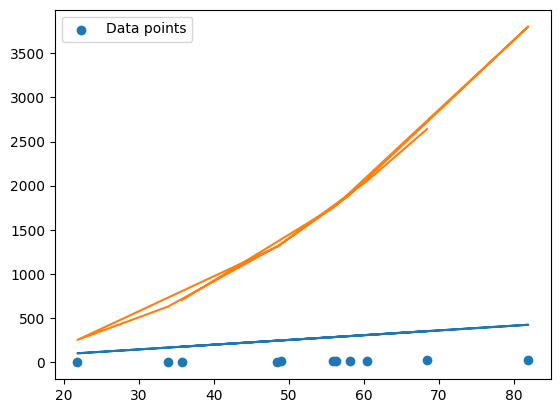

In [ ]:
# Plot Nonlinear vs Linear Models
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
nonlinear_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

linear_optimizer = optim.SGD([linear_params], lr = 0.01)
nonlinear_optimizer = optim.SGD([nonlinear_params], lr = 0.0001)

linear = linear_training1(5000, linear_optimizer, linear_params, train_t_un, val_t_un, train_t_c, val_t_c)
nonlinear = nonlinear_training(5000, nonlinear_optimizer, nonlinear_params, train_t_un, val_t_un, train_t_c, val_t_c)

t_p_lin = linear_model1(t_u, *linear).detach().numpy()
t_p_non = nonlinear_model(t_u, *nonlinear).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data points')
plt.plot(t_u, t_p_lin)
plt.plot(t_u, t_p_non)

plt.legend()
plt.show()

In [159]:
# Problem 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Import data from my GitHub
housing_url = 'https://raw.githubusercontent.com/karrin10/Homework-5/main/Housing%20(1).csv'
# Create dataFrame from URL
housing_df = pd.read_csv(housing_url)
# Display the first 5 rows of the dataFrame
# housing_df.head()

In [160]:
# Defining model2
def linear_model2(t_x, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

In [161]:
# Defining training2
def linear_training2(epochs, optimizer, params, t_x_train, t_x_valid, t_y_train, t_y_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = linear_model2(t_x_train, *params)
    train_loss = loss(t_p_train, t_y_train)

    t_p_valid = linear_model2(t_x_valid, *params)
    valid_loss = loss(t_p_valid, t_y_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params, train_losses, valid_losses

In [180]:
# Categorize data
varlist = ["area", "bedrooms", "bathrooms", "stories", "parking"]

x = housing_df[varlist].values
y = housing_df['price'].values

# Standardize input
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Standardize output
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

t_x = torch.tensor(x_scaled)
t_y = torch.tensor(y_scaled)

n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]

val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

In [183]:
# SGD: Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.1)
print('Learning rate of 0.1: \n')
model1, train_loss1, valid_loss1 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss1 = np.array([item.detach().item() for item in train_loss1])
sgd_valid_loss1 = np.array([item.detach().item() for item in valid_loss1])

# SGD: Learning rate of 0.05
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.05)
print('Learning rate of 0.05: \n')
model2, train_loss2, valid_loss2 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss2 = np.array([item.detach().item() for item in train_loss2])
sgd_valid_loss2 = np.array([item.detach().item() for item in valid_loss2])

# SGD: Learning rate of 0.005
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.005)
print('Learning rate of 0.005: \n')
model3, train_loss3, valid_loss3 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss3 = np.array([item.detach().item() for item in train_loss3])
sgd_valid_loss3 = np.array([item.detach().item() for item in valid_loss3])

# SGD: Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.0001)
print('Learning rate of 0.0001: \n')
model4, train_loss4, valid_loss4 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss4 = np.array([item.detach().item() for item in train_loss4])
sgd_valid_loss4 = np.array([item.detach().item() for item in valid_loss4])

Learning rate of 0.1: 

Epochs: 500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 1000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 1500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 2000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 2500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 3000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 3500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 4000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 4500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 5000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Learning rate of 0.05: 

Epochs: 500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 1000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 1500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 2000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

E

In [182]:
# Adam Optimizer: Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.1)
print('Learning rate of 0.1: \n')
model1, train_loss1, valid_loss1 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss1 = np.array([item.detach().item() for item in train_loss1])
adam_valid_loss1 = np.array([item.detach().item() for item in valid_loss1])

# Adam Optimizer: Learning rate of 0.05
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.05)
print('Learning rate of 0.05: \n')
model2, train_loss2, valid_loss2 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss2 = np.array([item.detach().item() for item in train_loss2])
adam_valid_loss2 = np.array([item.detach().item() for item in valid_loss2])

# Adam Optimizer: Learning rate of 0.005
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.005)
print('Learning rate of 0.005: \n')
model3, train_loss3, valid_loss3 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss3 = np.array([item.detach().item() for item in train_loss3])
adam_valid_loss3 = np.array([item.detach().item() for item in valid_loss3])

# Adam Optimizer: Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.0001)
print('Learning rate of 0.0001: \n')
model4, train_loss4, valid_loss4 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss4 = np.array([item.detach().item() for item in train_loss4])
adam_valid_loss4 = np.array([item.detach().item() for item in valid_loss4])

Learning rate of 0.1: 

Epochs: 500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 1000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 1500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 2000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 2500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 3000, 	Training Loss: 0.453274, 	Validation Loss: 0.389331

Epochs: 3500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 4000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 4500, 	Training Loss: 0.453274, 	Validation Loss: 0.389324

Epochs: 5000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Learning rate of 0.05: 

Epochs: 500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 1000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 1500, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

Epochs: 2000, 	Training Loss: 0.453274, 	Validation Loss: 0.389330

E

Text(0.5, 1.0, 'SGD: Loss with Learning Rate of 0.1')

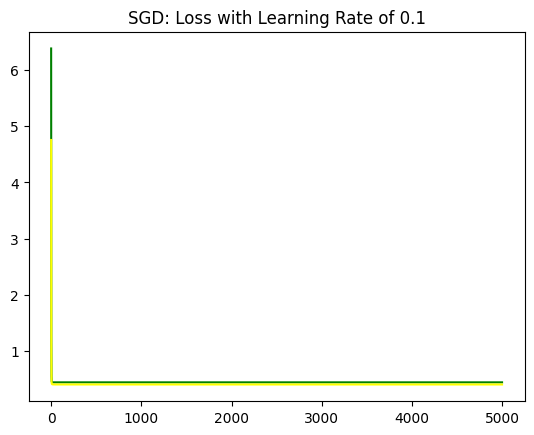

In [165]:
# SGD Plot: Loss with Learning Rate of 0.1
plt.plot(sgd_train_loss1, color='green')
plt.plot(sgd_valid_loss1, color='yellow')
plt.title('SGD: Loss with Learning Rate of 0.1')

Text(0.5, 1.0, 'SGD: Loss with Learning Rate of 0.05')

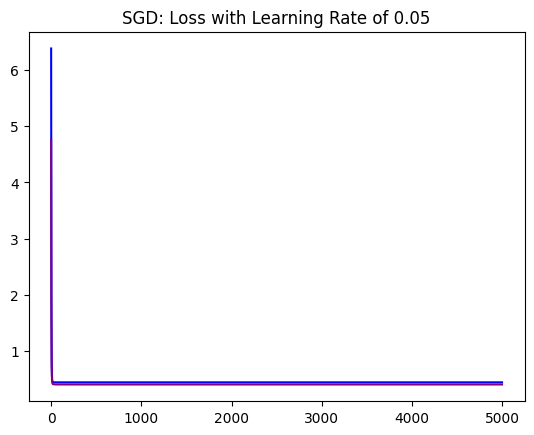

In [166]:
# SGD Plot: Loss with Learning Rate of 0.05
plt.plot(sgd_train_loss2, color='blue')
plt.plot(sgd_valid_loss2, color='purple')
plt.title('SGD: Loss with Learning Rate of 0.05')

Text(0.5, 1.0, 'SGD: Loss with Learning Rate of 0.005')

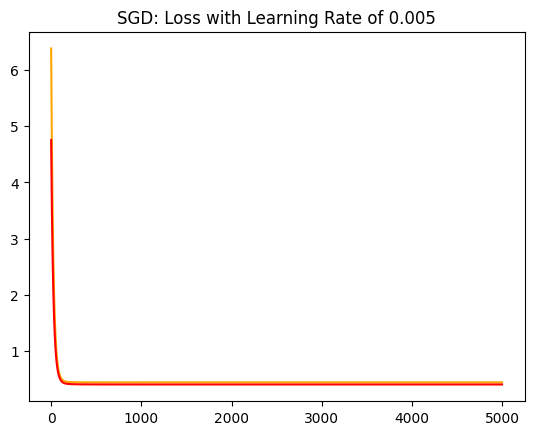

In [167]:
# SGD Plot: Loss with Learning Rate of 0.005
plt.plot(sgd_train_loss3, color='orange')
plt.plot(sgd_valid_loss3, color='red')
plt.title('SGD: Loss with Learning Rate of 0.005')

Text(0.5, 1.0, 'SGD: Loss with Learning Rate of 0.0001')

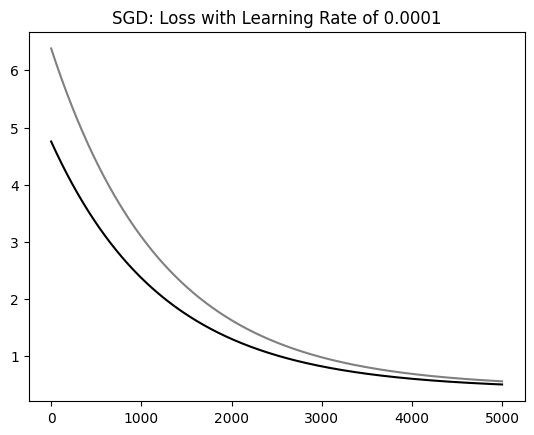

In [168]:
# SGD Plot: Loss with Learning Rate of 0.0001
plt.plot(sgd_train_loss4, color='grey')
plt.plot(sgd_valid_loss4, color='black')
plt.title('SGD: Loss with Learning Rate of 0.0001')

Text(0.5, 1.0, 'Adam Optimizer: Loss with Learning Rate of 0.1')

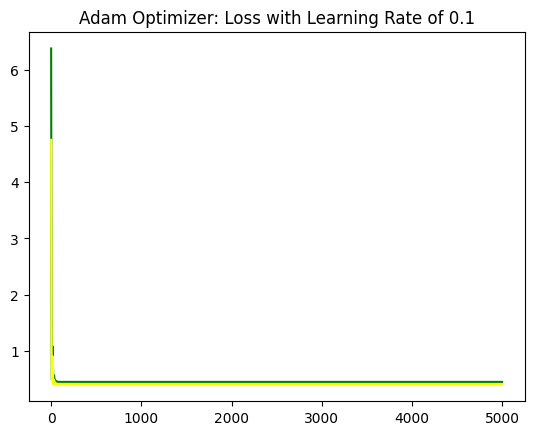

In [169]:
# Adam Plot: Loss with Learning Rate of 0.1
plt.plot(adam_train_loss1, color='green')
plt.plot(adam_valid_loss1, color='yellow')
plt.title('Adam Optimizer: Loss with Learning Rate of 0.1')

Text(0.5, 1.0, 'Adam Optimizer: Loss with Learning Rate of 0.05')

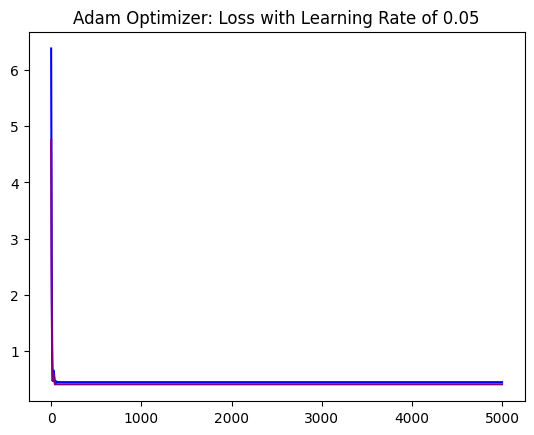

In [170]:
# Adam Plot: Loss with Learning Rate of 0.05
plt.plot(adam_train_loss2, color='blue')
plt.plot(adam_valid_loss2, color='purple')
plt.title('Adam Optimizer: Loss with Learning Rate of 0.05')

Text(0.5, 1.0, 'Adam Optimizer: Loss with Learning Rate of 0.005')

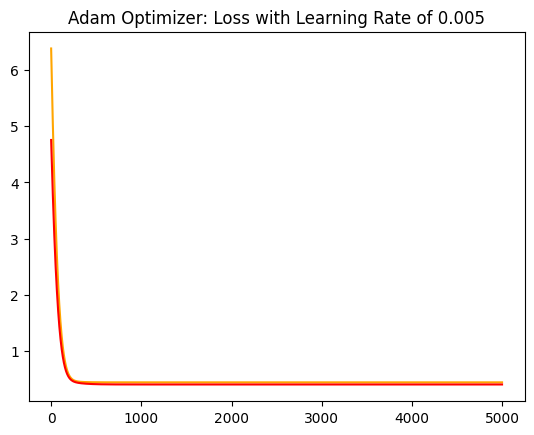

In [171]:
# Adam Plot: Loss with Learning Rate of 0.005
plt.plot(adam_train_loss3, color='orange')
plt.plot(adam_valid_loss3, color='red')
plt.title('Adam Optimizer: Loss with Learning Rate of 0.005')

Text(0.5, 1.0, 'Adam Optimizer: Loss with Learning Rate of 0.0001')

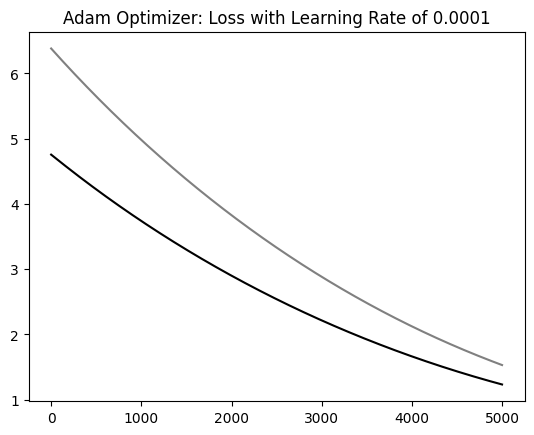

In [172]:
# Adam Plot: Loss with Learning Rate of 0.0001
plt.plot(adam_train_loss4, color='grey')
plt.plot(adam_valid_loss4, color='black')
plt.title('Adam Optimizer: Loss with Learning Rate of 0.0001')

In [188]:
# Problem 3 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Recall dataframe as housing2
housing2_df = pd.read_csv(housing_url)

# Map string variables to binary values
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

housing2_df[variable_list] = housing2_df[variable_list].apply(binary_mapping)
housing2_df = housing2_df.drop('furnishingstatus', axis=1)

In [187]:
# Defining model3
def linear_model3(t_x, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

In [189]:
# Defining training3
def linear_training3(epochs, optimizer, params, t_x_train, t_x_valid, t_y_train, t_y_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = linear_model3(t_x_train, *params)
    train_loss = loss(t_p_train, t_y_train)

    t_p_valid = linear_model3(t_x_valid, *params)
    valid_loss = loss(t_p_valid, t_y_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params, train_losses, valid_losses

In [190]:
# Creating data
y = housing2_df['price'].values
housing2_df = housing2_df.drop('price', axis=1)
x = housing2_df.values

# Standardize input
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Standardize output
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

t_x = torch.tensor(x_scaled)
t_y = torch.tensor(y_scaled)

n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]

val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

In [192]:
# SGD: Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.1)
print('Learning rate of 0.1: \n')
model5, train_loss5, valid_loss5 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss5 = np.array([item.detach().item() for item in train_loss5])
sgd_valid_loss5 = np.array([item.detach().item() for item in valid_loss5])

# SGD: Learning rate of 0.05
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.05)
print('Learning rate of 0.05: \n')
model6, train_loss6, valid_loss6 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss6 = np.array([item.detach().item() for item in train_loss6])
sgd_valid_loss6 = np.array([item.detach().item() for item in valid_loss6])

# SGD: Learning rate of 0.005
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.005)
print('Learning rate of 0.005: \n')
model7, train_loss7, valid_loss7 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss7 = np.array([item.detach().item() for item in train_loss7])
sgd_valid_loss7 = np.array([item.detach().item() for item in valid_loss7])

# SGD: Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.0001)
print('Learning rate of 0.0001: \n')
model8, train_loss8, valid_loss8 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss8 = np.array([item.detach().item() for item in train_loss8])
sgd_valid_loss8 = np.array([item.detach().item() for item in valid_loss8])

Learning rate of 0.1: 

Epochs: 500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 1000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 1500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 2000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 2500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 3000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 3500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 4000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 4500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 5000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Learning rate of 0.05: 

Epochs: 500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 1000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 1500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 2000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

E

In [193]:
# Adam Optimizer: Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.1)
print('Learning rate of 0.1: \n')
model5, train_loss5, valid_loss5 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss5 = np.array([item.detach().item() for item in train_loss5])
adam_valid_loss5 = np.array([item.detach().item() for item in valid_loss5])

# Adam Optimizer: Learning rate of 0.05
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.05)
print('Learning rate of 0.05: \n')
model6, train_loss6, valid_loss6 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss6 = np.array([item.detach().item() for item in train_loss6])
adam_valid_loss6 = np.array([item.detach().item() for item in valid_loss6])

# Adam Optimizer: Learning rate of 0.005
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.005)
print('Learning rate of 0.005: \n')
model7, train_loss7, valid_loss7 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss7 = np.array([item.detach().item() for item in train_loss7])
adam_valid_loss7 = np.array([item.detach().item() for item in valid_loss7])

# Adam Optimizer: Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.0001)
print('Learning rate of 0.0001: \n')
model8, train_loss8, valid_loss8 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss8 = np.array([item.detach().item() for item in train_loss8])
adam_valid_loss8 = np.array([item.detach().item() for item in valid_loss8])

Learning rate of 0.1: 

Epochs: 500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 1000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 1500, 	Training Loss: 0.280716, 	Validation Loss: 0.525863

Epochs: 2000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 2500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 3000, 	Training Loss: 0.280738, 	Validation Loss: 0.527261

Epochs: 3500, 	Training Loss: 0.280689, 	Validation Loss: 0.526425

Epochs: 4000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 4500, 	Training Loss: 0.280689, 	Validation Loss: 0.526407

Epochs: 5000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Learning rate of 0.05: 

Epochs: 500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 1000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 1500, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

Epochs: 2000, 	Training Loss: 0.280689, 	Validation Loss: 0.526424

E

Text(0.5, 1.0, 'SGD: Loss with Learning Rate of 0.1')

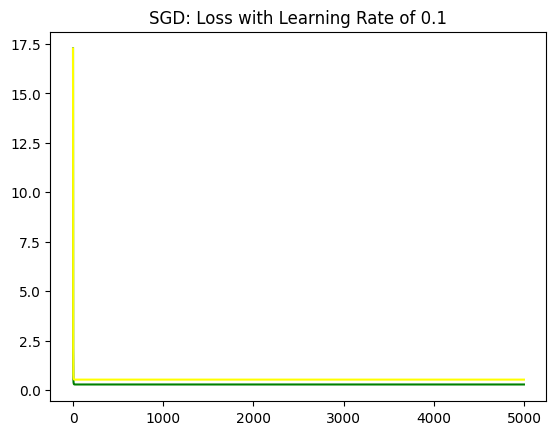

In [205]:
# SGD Plot: Loss with Learning Rate of 0.1
plt.plot(sgd_train_loss5, color='green')
plt.plot(sgd_valid_loss5, color='yellow')
plt.title('SGD: Loss with Learning Rate of 0.1')

Text(0.5, 1.0, 'SGD: Loss with Learning Rate of 0.05')

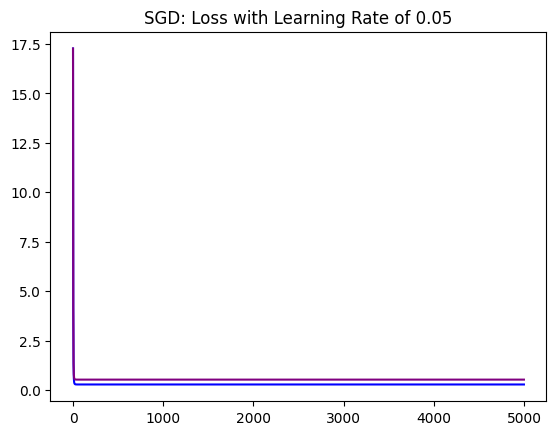

In [204]:
# SGD Plot: Loss with Learning Rate of 0.05
plt.plot(sgd_train_loss6, color='blue')
plt.plot(sgd_valid_loss6, color='purple')
plt.title('SGD: Loss with Learning Rate of 0.05')

Text(0.5, 1.0, 'SGD: Loss with Learning Rate of 0.005')

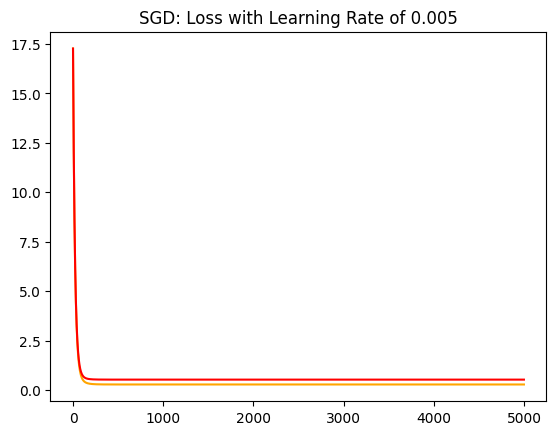

In [203]:
# SGD Plot: Loss with Learning Rate of 0.005
plt.plot(sgd_train_loss7, color='orange')
plt.plot(sgd_valid_loss7, color='red')
plt.title('SGD: Loss with Learning Rate of 0.005')

Text(0.5, 1.0, 'SGD: Loss with Learning Rate of 0.0001')

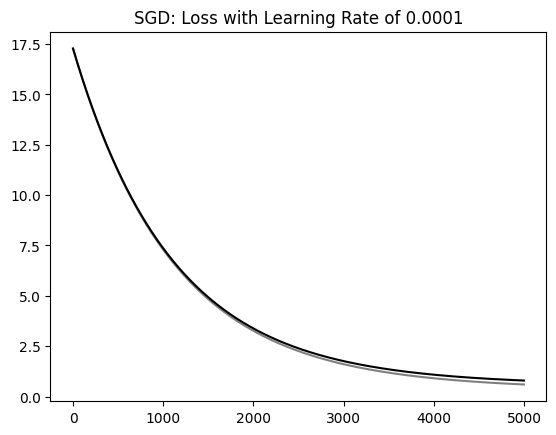

In [202]:
# SGD Plot: Loss with Learning Rate of 0.0001
plt.plot(sgd_train_loss8, color='grey')
plt.plot(sgd_valid_loss8, color='black')
plt.title('SGD: Loss with Learning Rate of 0.0001')

Text(0.5, 1.0, 'Adam Optimizer: Loss with Learning Rate of 0.1')

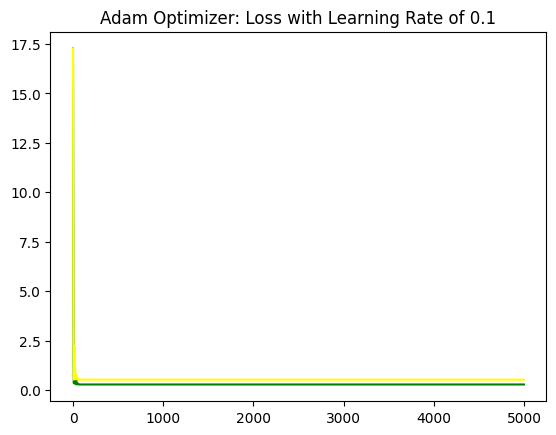

In [211]:
# Adam Plot: Loss with Learning Rate of 0.1
plt.plot(adam_train_loss5, color='green')
plt.plot(adam_valid_loss5, color='yellow')
plt.title('Adam Optimizer: Loss with Learning Rate of 0.1')

Text(0.5, 1.0, 'Adam Optimizer: Loss with Learning Rate of 0.05')

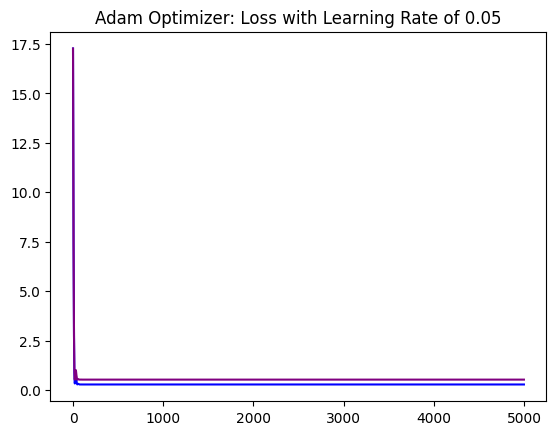

In [212]:
# Adam Plot: Loss with Learning Rate of 0.05
plt.plot(adam_train_loss6, color='blue')
plt.plot(adam_valid_loss6, color='purple')
plt.title('Adam Optimizer: Loss with Learning Rate of 0.05')

Text(0.5, 1.0, 'Adam Optimizer: Loss with Learning Rate of 0.005')

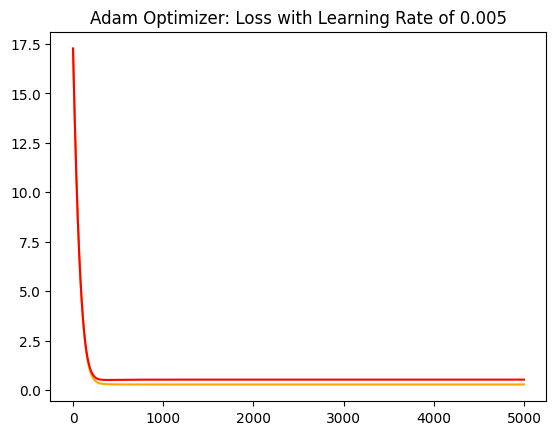

In [213]:
# Adam Plot: Loss with Learning Rate of 0.005
plt.plot(adam_train_loss7, color='orange')
plt.plot(adam_valid_loss7, color='red')
plt.title('Adam Optimizer: Loss with Learning Rate of 0.005')

Text(0.5, 1.0, 'Adam Optimizer: Loss with Learning Rate of 0.0001')

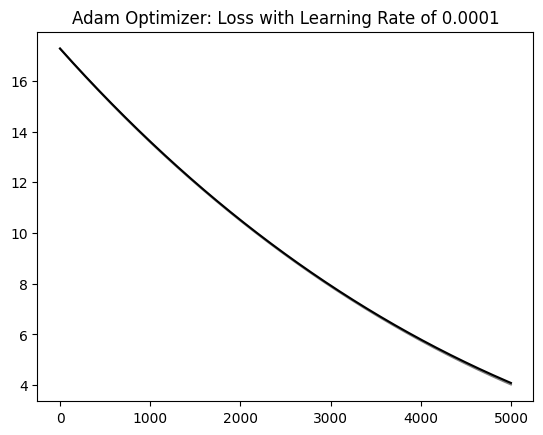

In [210]:
# Adam Plot: Loss with Learning Rate of 0.0001
plt.plot(adam_train_loss8, color='grey')
plt.plot(adam_valid_loss8, color='black')
plt.title('Adam Optimizer: Loss with Learning Rate of 0.0001')